# Attribute Inference Attack (AIA) Dataset C

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/PRIVACY'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for membership attack simulation
from attribute_inference import DataPreProcessor
from attribute_inference import RiskAttributesPredictors
from attribute_inference import identified_attributes_percentage


#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/C_Obesity_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/C_Obesity_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/C_Obesity_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/C_Obesity_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/C_Obesity_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Obesity_level']
data = dict()

qid_columns = ['Gender','Age','Height','Weight','family_history_with_overweight','SMOKE']
risk_attributes = ['FAVC','FCVC','NCP','CAEC','CH2O','SCC','FAF','TUE','CALC','MTRANS','Obesity_level']
data = dict()
data_qid = dict()
data_risk = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    #data[name] = data[name].drop(['id'],axis=1)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category').cat.codes
    data_qid[name] = data[name][qid_columns]
    data_risk[name] = data[name][risk_attributes]
data

{'Real':       Gender  Age  Height  Weight  family_history_with_overweight  FAVC  \
 0          0   21    1.63   60.00                               1     1   
 1          0   21    1.75  133.62                               1     1   
 2          0   23    1.66   82.60                               1     1   
 3          0   22    1.59   44.24                               0     0   
 4          1   26    1.81  106.04                               1     1   
 ...      ...  ...     ...     ...                             ...   ...   
 1683       1   32    1.75  120.10                               1     1   
 1684       1   23    1.72   81.67                               1     1   
 1685       0   23    1.65   80.00                               1     1   
 1686       0   23    1.63   84.50                               1     1   
 1687       1   20    1.82   85.00                               1     1   
 
           FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
 

In [5]:
data_qid

{'Real':       Gender  Age  Height  Weight  family_history_with_overweight  SMOKE
 0          0   21    1.63   60.00                               1      1
 1          0   21    1.75  133.62                               1      0
 2          0   23    1.66   82.60                               1      0
 3          0   22    1.59   44.24                               0      0
 4          1   26    1.81  106.04                               1      0
 ...      ...  ...     ...     ...                             ...    ...
 1683       1   32    1.75  120.10                               1      0
 1684       1   23    1.72   81.67                               1      0
 1685       0   23    1.65   80.00                               1      0
 1686       0   23    1.63   84.50                               1      0
 1687       1   20    1.82   85.00                               1      0
 
 [1688 rows x 6 columns],
 'GM':       Gender  Age    Height      Weight  family_history_with_overweig

In [6]:
data_risk

{'Real':       FAVC      FCVC       NCP  CAEC      CH2O  SCC       FAF       TUE  CALC  \
 0        1  3.000000  3.000000     0  2.000000    0  2.000000  0.000000     2   
 1        1  3.000000  3.000000     2  2.887659    0  1.480919  0.779641     2   
 2        1  1.203754  1.355354     2  2.765593    0  0.128342  1.659476     2   
 3        0  3.000000  1.696080     1  2.550307    0  1.098862  0.000000     3   
 4        1  3.000000  3.000000     2  2.858171    0  1.813318  0.680215     2   
 ...    ...       ...       ...   ...       ...  ...       ...       ...   ...   
 1683     1  2.967300  3.000000     2  2.530035    0  0.955317  1.339232     2   
 1684     1  2.000000  1.729553     2  1.400247    0  0.887923  1.011983     2   
 1685     1  2.000000  3.000000     2  2.000000    0  0.146919  2.000000     3   
 1686     1  2.058687  2.962004     2  2.010596    0  0.851059  0.630866     3   
 1687     1  2.951180  3.000000     2  3.000000    0  2.433918  0.561602     2   
 
      

## 2. Train models to predict attributes values

In [7]:
#initialize classifiers
categorical_columns = ['Gender','family_history_with_overweight','SMOKE']
numerical_columns = ['Age','Height','Weight']
categories = [np.array([0, 1]), np.array([0, 1]), np.array([0, 1])]
    
classifiers_all = dict()
data_preprocessors = dict()
attributes_models_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(data_qid[name])
    
#     attributes_models = dict()
#     attributes_models = train_attributes_prediction_models(data_risk[name], x_train)
    attributes_models_all[name] = RiskAttributesPredictors(data_risk[name], qid_columns)
    attributes_models_all[name].train_attributes_prediction_models(x_train)
    
    print('####################################################')

GM
Model trained for FAVC attribute
Model trained for FCVC attribute
Model trained for NCP attribute
Model trained for CAEC attribute
Model trained for CH2O attribute
Model trained for SCC attribute
Model trained for FAF attribute
Model trained for TUE attribute
Model trained for CALC attribute
Model trained for MTRANS attribute
Model trained for Obesity_level attribute
####################################################
SDV
Model trained for FAVC attribute
Model trained for FCVC attribute
Model trained for NCP attribute
Model trained for CAEC attribute
Model trained for CH2O attribute
Model trained for SCC attribute
Model trained for FAF attribute
Model trained for TUE attribute
Model trained for CALC attribute
Model trained for MTRANS attribute
Model trained for Obesity_level attribute
####################################################
CTGAN
Model trained for FAVC attribute
Model trained for FCVC attribute
Model trained for NCP attribute
Model trained for CAEC attribute
Model trai

## 3. Read Real Data and Find Combinations

In [8]:
#read real dataset
real_data = pd.read_csv(HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/C_Obesity_Data_Real_Train.csv')
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category').cat.codes
real_data = real_data.sample(frac=1)
real_data = real_data[0:int(len(real_data)*0.5)]
real_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
287,0,27,1.60,61.00,0,yes,3.000000,3.000000,Always,0,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
434,0,22,1.50,49.00,1,no,2.000000,1.000000,Sometimes,0,2.000000,no,3.000000,0.000000,no,Walking,Normal_Weight
301,0,25,1.70,80.75,1,yes,2.545270,3.000000,Sometimes,0,2.269564,no,0.503122,1.000000,Frequently,Public_Transportation,Overweight_Level_II
553,0,19,1.69,49.90,0,yes,1.212908,3.207071,Sometimes,0,1.029703,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
352,1,30,1.76,111.95,1,yes,1.067909,3.656401,Sometimes,0,1.984590,no,0.054238,0.000000,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,1,38,1.70,78.00,0,yes,3.000000,3.000000,Frequently,0,2.000000,no,0.000000,0.000000,Frequently,Automobile,Overweight_Level_II
1355,1,25,1.77,114.16,1,yes,2.159033,3.000000,Sometimes,0,2.116399,no,1.331526,0.052942,Sometimes,Public_Transportation,Obesity_Type_II
1557,1,31,1.64,100.00,1,yes,2.964050,2.123138,Sometimes,0,1.000000,no,1.699181,0.620465,no,Public_Transportation,Obesity_Type_II
501,0,38,1.70,78.97,1,yes,3.000000,3.000000,Sometimes,0,2.981604,no,0.000000,0.000000,no,Automobile,Overweight_Level_II


In [9]:
combinations = real_data[qid_columns]
combinations.drop_duplicates(keep='first',inplace=True) 
combinations

,Gender,Age,Height,Weight,family_history_with_overweight,SMOKE
287,0,27,1.60,61.00,0,0
434,0,22,1.50,49.00,1,0
301,0,25,1.70,80.75,1,0
553,0,19,1.69,49.90,0,0
352,1,30,1.76,111.95,1,0
...,...,...,...,...,...,...
538,1,22,1.72,98.58,1,0
847,1,38,1.70,78.00,0,0
1355,1,25,1.77,114.16,1,0
1557,1,31,1.64,100.00,1,0


In [10]:
results_data_all = dict()
columns_results = ['Gender','Age','Height','Weight','family_history_with_overweight','SMOKE','FAVC_accuracy','FCVC_rmse',
                   'NCP_rmse','CAEC_accuracy', 'CH2O_rmse','SCC_accuracy','FAF_rmse','TUE_rmse','CALC_accuracy',
                   'MTRANS_accuracy','Obesity_level_accuracy']

for name in SYNTHESIZERS : 
    print(name)
    results_data = pd.DataFrame(columns = columns_results)
    
    for comb in combinations.values :
    
        batch = real_data.loc[(real_data['Gender'] == comb[0]) & (real_data['Age'] == comb[1])
                             & (real_data['Height'] == comb[2]) & (real_data['Weight'] == comb[3])]
        
        row_data = (batch[qid_columns].values[0]).tolist()
        print(row_data)
        x_test = data_preprocessors[name].preprocess_test_data(batch[qid_columns])
        print(x_test.shape)
        
        row = attributes_models_all[name].evaluate_attributes_prediction_models(x_test, batch, columns_results)
        
        results_data = results_data.append(row)
        
    results_data_all[name] = results_data
    print('#######################################')

GM
[0.0, 27.0, 1.6, 61.0, 0.0, 0.0]
(1, 9)
Model evaluated for FAVC attribute
Model evaluated for FCVC attribute
Model evaluated for NCP attribute
Model evaluated for CAEC attribute
Model evaluated for CH2O attribute
Model evaluated for SCC attribute
Model evaluated for FAF attribute
Model evaluated for TUE attribute
Model evaluated for CALC attribute
Model evaluated for MTRANS attribute
Model evaluated for Obesity_level attribute
[0.0, 22.0, 1.5, 49.0, 1.0, 0.0]
(1, 9)
Model evaluated for FAVC attribute
Model evaluated for FCVC attribute
Model evaluated for NCP attribute
Model evaluated for CAEC attribute
Model evaluated for CH2O attribute
Model evaluated for SCC attribute
Model evaluated for FAF attribute
Model evaluated for TUE attribute
Model evaluated for CALC attribute
Model evaluated for MTRANS attribute
Model evaluated for Obesity_level attribute
[0.0, 25.0, 1.7, 80.75, 1.0, 0.0]
(1, 9)
Model evaluated for FAVC attribute
Model evaluated for FCVC attribute
Model evaluated for NC

In [11]:
results_data_all

{'GM':     Gender   Age  Height  Weight  family_history_with_overweight  SMOKE  \
 0      0.0  27.0    1.60   61.00                             0.0    0.0   
 0      0.0  22.0    1.50   49.00                             1.0    0.0   
 0      0.0  25.0    1.70   80.75                             1.0    0.0   
 0      0.0  19.0    1.69   49.90                             0.0    0.0   
 0      1.0  30.0    1.76  111.95                             1.0    0.0   
 ..     ...   ...     ...     ...                             ...    ...   
 0      1.0  22.0    1.72   98.58                             1.0    0.0   
 0      1.0  38.0    1.70   78.00                             0.0    0.0   
 0      1.0  25.0    1.77  114.16                             1.0    0.0   
 0      1.0  31.0    1.64  100.00                             1.0    0.0   
 0      0.0  38.0    1.70   78.97                             1.0    0.0   
 
     FAVC_accuracy  FCVC_rmse  NCP_rmse  CAEC_accuracy  CH2O_rmse  \
 0         

## 5. Visuzalize obtained results

In [12]:
results_columns = ['FAVC_accuracy','FCVC_rmse','NCP_rmse','CAEC_accuracy', 'CH2O_rmse','SCC_accuracy','FAF_rmse','TUE_rmse',
                   'CALC_accuracy','MTRANS_accuracy','Obesity_level_accuracy']
len(results_columns)

11

In [13]:
for name in SYNTHESIZERS : 
    identified_attributes = identified_attributes_percentage(results_data_all[name], results_columns)
    print(name,' : ', identified_attributes)

GM  :  0.09
SDV  :  0.09
CTGAN  :  0.09
WGANGP  :  0.18


In [14]:
boxplots_data = dict()

for c in results_columns :
    boxplots_data[c] = results_data_all[SYNTHESIZERS[0]][c]
    
    for i in range(1,len(SYNTHESIZERS)) :
        boxplots_data[c] = np.column_stack((boxplots_data[c], results_data_all[SYNTHESIZERS[i]][c]))

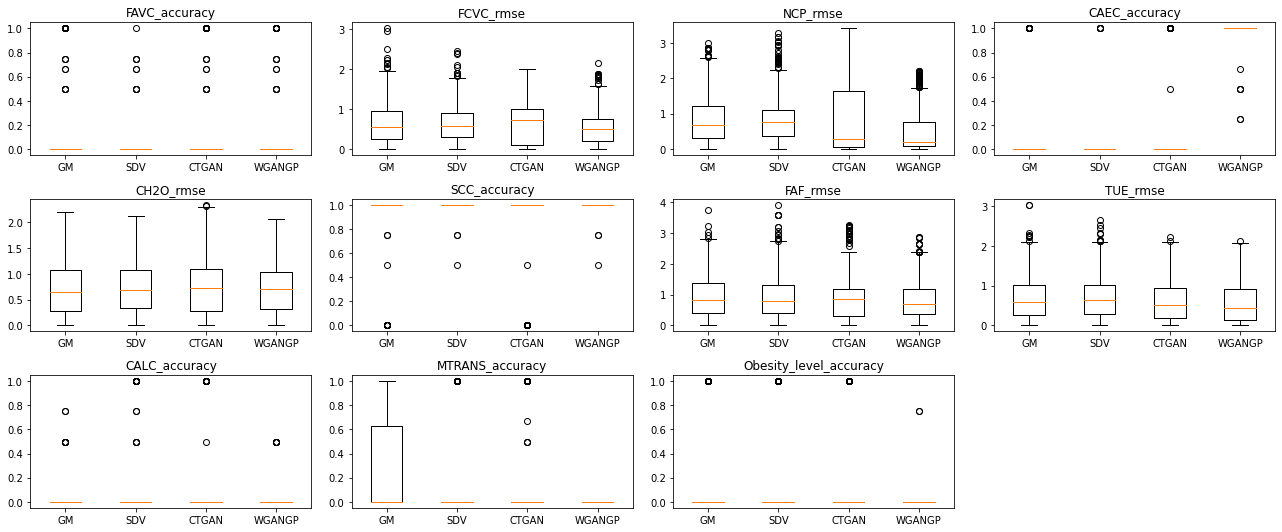

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18,2.5*3))
axs_idxs = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3], [2,0], [2,1], [2,2]]
idx = dict(zip(results_columns,axs_idxs))

for c in results_columns :
    ax = axs[idx[c][0], idx[c][1]]
    ax.boxplot(boxplots_data[c])
    ax.set_title(c)
    ax.set_xticklabels(SYNTHESIZERS)
    
fig.delaxes(axs[2,3])
#fig.suptitle('Attributes Inference Tests Results \n Dataset C - Obesity level estimation', fontsize=18)
fig.tight_layout()
fig.savefig('INFERENCE TESTS RESULTS/ATTRIBUTES INFERENCE TESTS RESULTS.svg', bbox_inches='tight')